# CREATE DEEP NEURAL NETWORK

In [15]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Flatten, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import L2

from os.path import join
from os import listdir
from shutil import copy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# GLOBAL VARIABLES
preprocessingPath="preprocessingData"
path = "data"
classes = listdir(preprocessingPath)
trainPath = join(path,"train")
valPath = join(path,"val")
train = 0.80 # ;val = 1. - train
np.random.seed(26)


batch_size = 32
epochs = 256
lr = 1e-4
input_shape = (224,224)
channels = (1,)
class_mode = 'sparse'
color_mode = 'grayscale'
num_class = len(classes)

## Mount files to data generators

In [17]:
# ## SEPARATING TO TRAIN AND VALIDATION SETS
# for c in classes:
#     classPath = join(preprocessingPath,c)
#     images = listdir(classPath)
#     np.random.shuffle(images)
#     numImages = len(images)
#     setClassPath = join(trainPath,c)
#     for n,image in enumerate(images):
#         if n == round(numImages*train): 
#             setClassPath = join(valPath,c)
#         imagePath = join(classPath,image)
#         newImagePath = join(setClassPath,image)
#         copy(imagePath, newImagePath)

In [81]:
train_generator = ImageDataGenerator(rescale=1./255,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2, 
                                     zoom_range = 0.2,
                                     shear_range = 0.5,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                    #  rotation_range = 45,
                                     ).flow_from_directory(directory = trainPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

val_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory = valPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

ValueError: Invalid class_mode: <class 'float'>; expected one of: {'sparse', 'categorical', 'input', 'binary', None}

## CREATE MODEL

In [50]:
model = Sequential()
model.add(Input(input_shape+channels))
model.add(Flatten())
model.add(Dense(units=512)) #, kernel_regularizer=L2()
model.add(LeakyReLU())
# model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=512))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))



In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 50176)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               25690624  
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)              

In [52]:
model.compile(optimizer=Adam(lr), loss='mean_squared_error', metrics=['mae'])

In [53]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-7)
es = EarlyStopping(monitor='val_loss', patience=7)

history = model.fit(train_generator, validation_data = val_generator, 
                        epochs = epochs, callbacks=[reduce_lr, es], 
                        verbose = 1)

Epoch 1/256
24/24 [==============================] - 3s 90ms/step - loss: 16.7650 - mae: 3.0984 - val_loss: 5.0295 - val_mae: 1.9505 - lr: 1.0000e-04
Epoch 2/256
24/24 [==============================] - 2s 88ms/step - loss: 6.6897 - mae: 2.0355 - val_loss: 1.5944 - val_mae: 1.0167 - lr: 1.0000e-04
Epoch 3/256
24/24 [==============================] - 2s 89ms/step - loss: 4.2833 - mae: 1.6205 - val_loss: 1.2466 - val_mae: 0.8940 - lr: 1.0000e-04
Epoch 4/256
24/24 [==============================] - 2s 83ms/step - loss: 3.4275 - mae: 1.4965 - val_loss: 1.1254 - val_mae: 0.8669 - lr: 1.0000e-04
Epoch 5/256
24/24 [==============================] - 2s 87ms/step - loss: 3.3214 - mae: 1.4296 - val_loss: 1.2222 - val_mae: 0.9001 - lr: 1.0000e-04
Epoch 6/256
24/24 [==============================] - 2s 85ms/step - loss: 3.0452 - mae: 1.3578 - val_loss: 1.2600 - val_mae: 0.8904 - lr: 1.0000e-04
Epoch 7/256
24/24 [==============================] - 2s 86ms/step - loss: 3.0757 - mae: 1.4140 - val_loss

## PLOT RESULTS

In [54]:
train_loss = history.history['loss']
train_mae = history.history['mae']
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']

best_epoch = np.argmin(np.array(val_mae))

print("Best Epoch: ", best_epoch)
print("Final Train Loss: {:.4f}".format(train_loss[best_epoch]))
print("Final Validation Loss: {:.4f}".format(val_loss[best_epoch]))
print("Final Train MAE: {:.4f}".format(train_mae[best_epoch]))
print("Final Test MAE: {:.4f}".format(val_mae[best_epoch]))

Best Epoch:  3
Final Train Loss: 3.4275
Final Validation Loss: 1.1254
Final Train MAE: 1.4965
Final Test MAE: 0.8669


In [55]:
import warnings
warnings.filterwarnings("ignore")

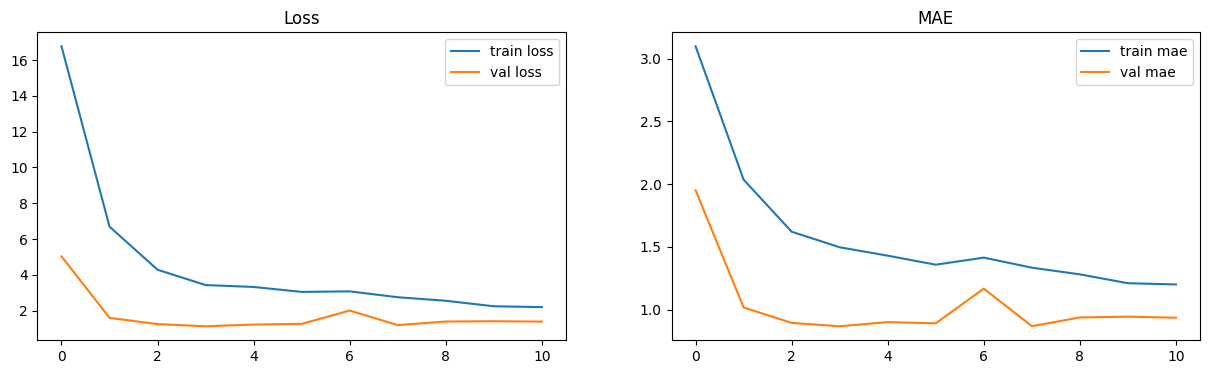

In [56]:

fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.lineplot(train_loss , ax=ax[0], label='train loss')
sns.lineplot(val_loss, ax=ax[0], label='val loss')
# ax[0].legend(labels=['train loss','validation loss'],loc="upper right")
ax[0].set_title('Loss')

sns.lineplot(train_mae, ax=ax[1], label='train mae')
sns.lineplot(val_mae, ax=ax[1], label='val mae')
# ax[1].legend(labels=['train acc','validation acc'],loc="upper right")
ax[1].set_title('MAE')

plt.show()


In [57]:
import cv2

In [64]:
test = cv2.imread("data//val//6//6K--81-_jpg-region_2.png")
truth = '6'

test = cv2.resize(test,(224,224))
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
test = test.reshape(1,224,224,1)

In [80]:
result = model.predict(next(val_generator)[0][8].reshape(1,224,224,1))[0][0]
print('Truth:',truth)
print('Result:',result)


1/1 [==============================] - 0s 17ms/step
Truth: 6
Result: 0.94596547


In [74]:
next(val_generator)[0][0].reshape(1,224,224,1).shape

(1, 224, 224, 1)